In [1]:
import pandas as pd
import seaborn as sns

## Voters

In [2]:
voters_raw = pd.read_excel('data/Active_Voters_by_Race_Gender_as_of_November_1_2020.xlsx')

In [3]:
voters_columns = voters_raw.iloc[7].apply(lambda el: '_'.join(el.strip().split()))
voters = voters_raw.iloc[8:167]

In [4]:
voters.columns = voters_columns
voters.columns.name = None

In [5]:
voters = voters.set_index(voters['COUNTY_NAME'])
voters = voters.drop(columns=['COUNTY_ID', 'COUNTY_NAME'])
voters.index.name = None

In [6]:
voters = voters.apply(pd.to_numeric)

In [7]:
voters

,AI_MALE_VOTERS,AI_FEMALE_VOTERS,AI_UNKNOWN_VOTERS,AP_MALE_VOTERS,AP_FEMALE_VOTERS,AP_UNKNOWN_VOTERS,BH_MALE_VOTERS,BH_FEMALE_VOTERS,BH_UNKNOWN_VOTERS,HP_MALE_VOTERS,...,WH_MALE_VOTERS,WH_FEMALE_VOTERS,WH_UNKNOWN_VOTERS,OT_MALE_VOTERS,OT_FEMALE_VOTERS,OT_UNKNOWN_VOTERS,UK_MALE_VOTERS,UK_FEMALE_VOTERS,UK_UNKNOWN_VOTERS,TOTAL_VOTERS
APPLING,10,5,0,26,28,0,886,1115,0,108,...,3913,4411,4,28,49,0,389,343,3,11440
ATKINSON,2,7,0,2,3,0,395,509,1,161,...,1514,1717,1,16,17,0,119,131,3,4801
BACON,2,3,0,8,10,0,322,525,1,55,...,2482,2838,4,18,20,0,216,172,1,6726
BAKER,1,1,0,5,7,0,408,514,0,8,...,572,610,0,5,6,0,58,51,0,2258
BALDWIN,16,15,1,106,137,0,4553,6322,5,104,...,6447,7300,14,85,114,0,753,642,3,26742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WHITFIELD,49,38,0,228,284,1,1021,1139,1,4199,...,17593,20078,50,308,357,2,2567,2386,19,54779
WILCOX,4,1,0,5,10,0,533,705,0,22,...,1483,1631,1,15,11,0,64,52,0,4562
WILKES,6,6,0,17,14,0,1108,1470,6,23,...,1819,1936,1,20,33,0,202,152,4,6836
WILKINSON,4,6,0,2,10,0,1113,1405,4,7,...,1748,1847,3,16,21,0,143,140,0,6484


## Votes

In [8]:
votes_file = pd.ExcelFile('data/detail.xlsx')

### Presidential Votes

In [9]:
presidential_votes_raw = pd.read_excel(votes_file, '1')

In [10]:
presidential_columns = [
    'COUNTY_NAME',
    'TRUMP_ELECTION_DAY_VOTES',
    'TRUMP_ABSENTEE_BY_MAIL_VOTES',
    'TRUMP_ADVANCED_VOTING_VOTES',
    'TRUMP_PROVISIONAL_VOTES',
    'TRUMP_TOTAL_VOTES',
    'BIDEN_ELECTION_DAY_VOTES',
    'BIDEN_ABSENTEE_BY_MAIL_VOTES',
    'BIDEN_ADVANCED_VOTING_VOTES',
    'BIDEN_PROVISIONAL_VOTES',
    'BIDEN_TOTAL_VOTES',
    'JORGENSEN_ELECTION_DAY_VOTES',
    'JORGENSEN_ABSENTEE_BY_MAIL_VOTES',
    'JORGENSEN_ADVANCED_VOTING_VOTES',
    'JORGENSEN_PROVISIONAL_VOTES',
    'JORGENSEN_TOTAL_VOTES',
    'TOTAL_VOTES_PRESIDENTIAL'
]
presidential_votes = presidential_votes_raw.iloc[2:161, :]

In [11]:
presidential_votes.columns = presidential_columns
presidential_votes.columns.name = None

In [12]:
presidential_votes = presidential_votes.set_index(presidential_votes['COUNTY_NAME'].apply(lambda el: el.upper()))
presidential_votes = presidential_votes.drop(columns=['COUNTY_NAME'])
presidential_votes.index.name = None

In [13]:
presidential_votes = presidential_votes.apply(pd.to_numeric)

In [14]:
presidential_votes

,TRUMP_ELECTION_DAY_VOTES,TRUMP_ABSENTEE_BY_MAIL_VOTES,TRUMP_ADVANCED_VOTING_VOTES,TRUMP_PROVISIONAL_VOTES,TRUMP_TOTAL_VOTES,BIDEN_ELECTION_DAY_VOTES,BIDEN_ABSENTEE_BY_MAIL_VOTES,BIDEN_ADVANCED_VOTING_VOTES,BIDEN_PROVISIONAL_VOTES,BIDEN_TOTAL_VOTES,JORGENSEN_ELECTION_DAY_VOTES,JORGENSEN_ABSENTEE_BY_MAIL_VOTES,JORGENSEN_ADVANCED_VOTING_VOTES,JORGENSEN_PROVISIONAL_VOTES,JORGENSEN_TOTAL_VOTES,TOTAL_VOTES_PRESIDENTIAL
APPLING,1753,890,3874,9,6526,334,587,855,3,1779,5,5,26,0,36,8341
ATKINSON,716,164,1419,1,2300,250,130,445,0,825,14,3,13,0,30,3155
BACON,431,487,3099,1,4018,140,196,288,1,625,8,4,13,0,25,4668
BAKER,291,138,466,2,897,149,234,269,0,652,2,2,2,0,6,1555
BALDWIN,1873,1290,5736,4,8903,1527,3000,4612,1,9140,63,38,107,0,208,18251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WHITFIELD,8963,3544,13084,45,25636,2814,2840,4997,19,10670,194,84,162,0,440,36746
WILCOX,743,343,1317,0,2403,285,212,365,0,862,8,2,6,0,16,3281
WILKES,704,467,1649,3,2823,504,754,897,4,2159,16,11,20,0,47,5029
WILKINSON,1293,259,1109,3,2664,528,602,942,3,2075,17,4,10,0,31,4770


### Perdue Votes

In [15]:
perdue_votes_raw = pd.read_excel(votes_file, '2')

In [16]:
perdue_columns = [
    'COUNTY_NAME',
    'PERDUE_ELECTION_DAY_VOTES',
    'PERDUE_ABSENTEE_BY_MAIL_VOTES',
    'PERDUE_ADVANCED_VOTING_VOTES',
    'PERDUE_PROVISIONAL_VOTES',
    'PERDUE_TOTAL_VOTES',
    'OSSOF_ELECTION_DAY_VOTES',
    'OSSOF_ABSENTEE_BY_MAIL_VOTES',
    'OSSOF_ADVANCED_VOTING_VOTES',
    'OSSOF_PROVISIONAL_VOTES',
    'OSSOF_TOTAL_VOTES',
    'HAZEL_ELECTION_DAY_VOTES',
    'HAZEL_ABSENTEE_BY_MAIL_VOTES',
    'HAZEL_ADVANCED_VOTING_VOTES',
    'HAZEL_PROVISIONAL_VOTES',
    'HAZEL_TOTAL_VOTES',
    'TOTAL_VOTES_PERDUE'
]
perdue_votes = perdue_votes_raw.iloc[2:161, :]

In [17]:
perdue_votes.columns = perdue_columns
perdue_votes.columns.name = None

In [18]:
perdue_votes = perdue_votes.set_index(perdue_votes['COUNTY_NAME'].apply(lambda el: el.upper()))
perdue_votes = perdue_votes.drop(columns=['COUNTY_NAME'])
perdue_votes.index.name = None

In [19]:
perdue_votes = perdue_votes.apply(pd.to_numeric)

In [20]:
perdue_votes

,PERDUE_ELECTION_DAY_VOTES,PERDUE_ABSENTEE_BY_MAIL_VOTES,PERDUE_ADVANCED_VOTING_VOTES,PERDUE_PROVISIONAL_VOTES,PERDUE_TOTAL_VOTES,OSSOF_ELECTION_DAY_VOTES,OSSOF_ABSENTEE_BY_MAIL_VOTES,OSSOF_ADVANCED_VOTING_VOTES,OSSOF_PROVISIONAL_VOTES,OSSOF_TOTAL_VOTES,HAZEL_ELECTION_DAY_VOTES,HAZEL_ABSENTEE_BY_MAIL_VOTES,HAZEL_ADVANCED_VOTING_VOTES,HAZEL_PROVISIONAL_VOTES,HAZEL_TOTAL_VOTES,TOTAL_VOTES_PERDUE
APPLING,1686,837,3774,9,6306,352,553,845,3,1753,33,21,74,0,128,8187
ATKINSON,709,170,1392,1,2272,220,123,430,0,773,23,3,26,0,52,3097
BACON,417,465,3047,0,3929,127,187,276,1,591,24,9,37,0,70,4590
BAKER,289,131,451,2,873,145,230,273,0,648,4,2,7,0,13,1534
BALDWIN,1845,1291,5733,4,8873,1500,2837,4445,1,8783,110,93,223,0,426,18082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WHITFIELD,8713,3444,12957,44,25158,2767,2593,4799,18,10177,398,175,388,1,962,36297
WILCOX,728,338,1303,0,2369,278,181,346,0,805,19,12,25,0,56,3230
WILKES,705,458,1644,3,2810,482,709,863,3,2057,26,17,35,0,78,4945
WILKINSON,1267,239,1099,3,2608,525,575,914,3,2017,32,20,27,0,79,4704


## Non-White vs Biden

In [21]:
join = pd.merge(voters, presidential_votes, left_index=True, right_index=True)

In [22]:
join['WHITE_VOTERS'] = join['WH_MALE_VOTERS'] + join['WH_FEMALE_VOTERS'] + join['WH_UNKNOWN_VOTERS']
join['NON_WHITE_VOTERS'] = join['TOTAL_VOTERS'] - join['WHITE_VOTERS']
join['NON_WHITE_RATIO'] = join['NON_WHITE_VOTERS'] / join['TOTAL_VOTERS']

In [23]:
join['BIDEN_RATIO'] = join['BIDEN_TOTAL_VOTES'] / join['TOTAL_VOTES_PRESIDENTIAL']

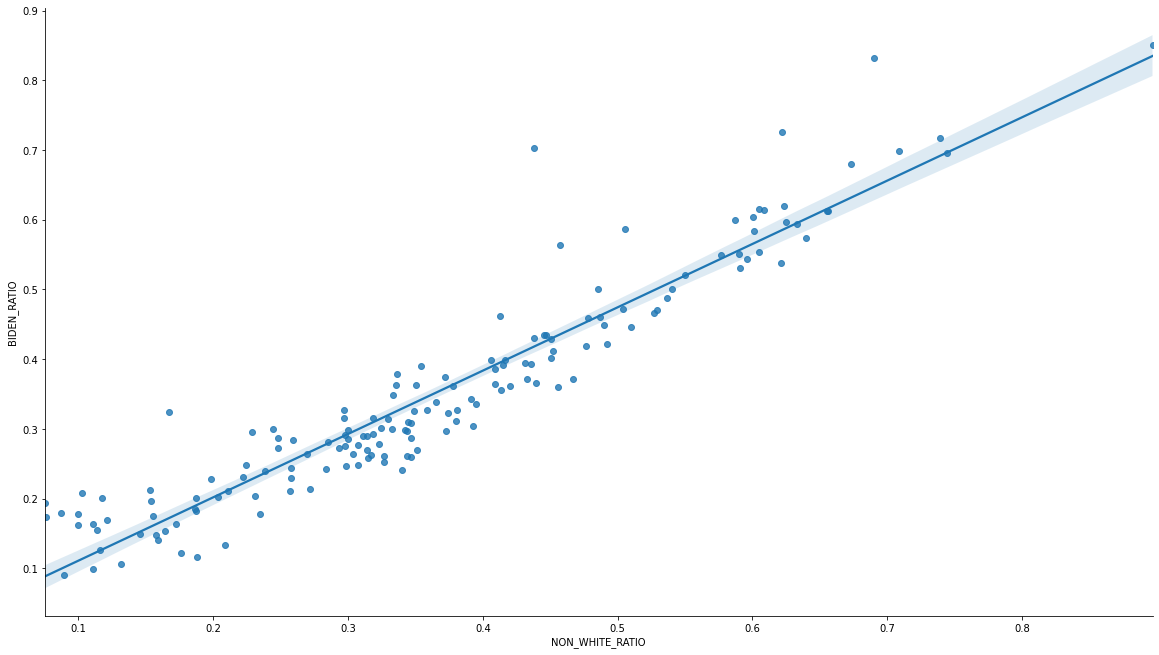

In [24]:
sns.lmplot(x='NON_WHITE_RATIO', y='BIDEN_RATIO', data=join, fit_reg=True, height=9, aspect=16/9)

In [25]:
join['NON_WHITE_RATIO'].corr(join['BIDEN_RATIO'])

0.946468937348362

## Counties where Biden outperformed Ossof

In [26]:
votes_join = pd.merge(presidential_votes, perdue_votes, left_index=True, right_index=True)
join = pd.merge(votes_join, voters, left_index=True, right_index=True)

In [27]:
join['BIDEN_RATIO'] = join['BIDEN_TOTAL_VOTES'] / join['TOTAL_VOTES_PRESIDENTIAL']

In [28]:
join['OSSOF_RATIO'] = join['OSSOF_TOTAL_VOTES'] / join['TOTAL_VOTES_PERDUE']

In [29]:
join['BIDEN_OUTPERFORMANCE'] = join['BIDEN_RATIO'] - join['OSSOF_RATIO']

In [30]:
join['OSSOF_POSSIBLE_VOTES'] = join['BIDEN_OUTPERFORMANCE'] * join['TOTAL_VOTERS']

In [31]:
join.sort_values(by='OSSOF_POSSIBLE_VOTES', ascending=False)['OSSOF_POSSIBLE_VOTES'].head(10)

FULTON      23380.599392
COBB        12822.430249
DEKALB      10612.638307
GWINNETT     9529.405369
FORSYTH      3375.071788
CHEROKEE     3294.408869
RICHMOND     2561.368396
MUSCOGEE     2267.755275
CHATHAM      2245.431153
HALL         1918.977137
Name: OSSOF_POSSIBLE_VOTES, dtype: float64